# Quantum Elastic Wave Equation Solver
#### v1.0.0
*Authors: Malte Schade, Cyrill Bösch, Vaclav Hapla, Andreas Fichtner*

[![License: GPL-3](https://img.shields.io/badge/License-GNU-yellow.svg)](https://opensource.org/license/gpl-3-0/)

## 1. Importing Dependencies

In [162]:
from simulation.experiment import ForwardExperiment1D
from utility.distributions import (spike, ricker, gaussian, raised_cosine,
                                    sinc, homogeneous, exponential, polynomial)


## 2. Setting up Qiskit Runtime Service Account

In [163]:
# # Set IBM Account
# from qiskit_ibm_runtime import QiskitRuntimeService
# user_token = '584edd99ef90bf00ee4344722b10210fde259d717e881f0cbd007696b00bcca23cd2026405ec9f4365bf7bc8cf5e44df21cc9e94ccf09ca1795b574c3486166f'
# QiskitRuntimeService.delete_account()
# QiskitRuntimeService.save_account(
#     channel='ibm_quantum',
#     instance='ibm-q/open/main',
#     token=user_token,
#     overwrite=True
#     )


In [164]:
# List all IBMQ Cloud Backends
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

## 3.1. Defining Simulation Parameters

In [165]:
# Set Experiment Parameters
nx = 63
parameters = {
    'dx': 1,                                        # Grid spacing
    'nx': nx,                                       # Number of grid points
    'dt': 0.0001,                                   # Time stepping
    'nt': 19,                                       # Number of time steps
    'order': 1,                                     # Finite-difference order
    'bcs': {'left': 'DBC', 'right': 'DBC'},         # Boundary conditions
    'mu': raised_cosine(3e10, nx+1, nx, 50, 1e10),   # Elastic modulus distribution
    'rho': raised_cosine(2e3, nx, nx-1, 50, 2e3),    # Density distribution
    'u': raised_cosine(1, nx, 30, 10, 0),                     # Initial positions
    'v': homogeneous(0, nx),                        # Initial velocities
    'backend': {
        'synthesis': 'MatrixExponential',           # Time Evolution Synthesis Method
        'batch_size': 100,                          # Circuit Batch Size
        'fitter': 'cvxpy_gaussian',                 # State Tomography fitter
        'backend': 'ibmq_qasm_simulator',           # Cloud backend name: ibm_brisbane/ibmq_qasm_simulator
        'shots': 1000,                              # Number of circuit samples
        'optimization': 3,                          # Circuit optimization level
        'resilience': 1,                            # Circuit resilience level
        'seed': 0,                                  # Transpilation seed
        'local_transpilation': False,               # Local transpilation
        'method': 'statevector',                    # Classical simulation method
        'fake': None,                               # Fake backend model (Currently not supported)
        }
    }


In [166]:
raised_cosine(3e10, nx+1, nx, 6, 1e10)

array([1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
      

In [167]:
import matplotlib.pyplot as plt

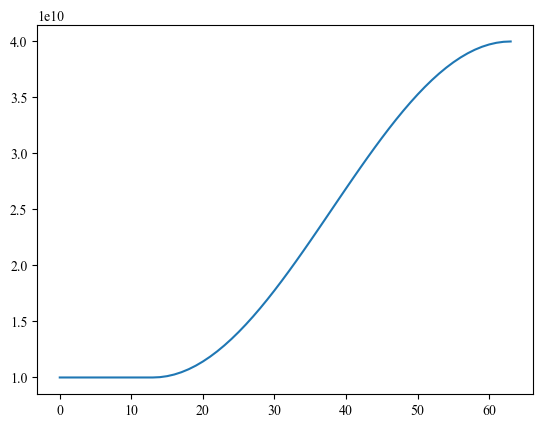

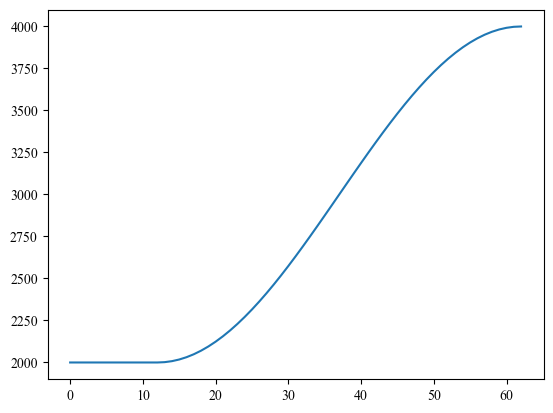

In [168]:
nx = 63
plt.plot(raised_cosine(3e10, nx+1, nx, 50, 1e10))
plt.figure()
plt.plot(raised_cosine(2e3, nx, nx-1, 50, 2e3))

In [169]:
mu = [
            10000000000.0,
            10000000000.0,
            10000000000.0,
            10000000000.0,
            10020556978.681393,
            10082171569.4759,
            10184674891.072935,
            10327785988.992914,
            10511112605.663977,
            10734152255.572697,
            10996293602.541975,
            11296818135.360985,
            11634902137.174484,
            12009618943.23342,
            12419941480.818642,
            12864745084.37579,
            13342810578.145435,
            13852827617.839085,
            14393398282.201788,
            14963040904.61713,
            15560194134.252441,
            16183221215.612904,
            16830414474.774593,
            17500000000.000004,
            18190142503.9068,
            18898950353.863,
            19624480756.820496,
            20364745084.37579,
            21117714323.46219,
            21881324637.733612,
            22653483024.396534,
            23432073050.9852,
            24214960656.355843,
            25000000000.0,
            25785039343.644157,
            26567926949.0148,
            27346516975.603466,
            28118675362.266388,
            28882285676.53781,
            29635254915.62421,
            30375519243.1795,
            31101049646.137005,
            31809857496.0932,
            32500000000.0,
            33169585525.225407,
            33816778784.387096,
            34439805865.74756,
            35036959095.38287,
            35606601717.79821,
            36147172382.16092,
            36657189421.85457,
            37135254915.62421,
            37580058519.181366,
            37990381056.76659,
            38365097862.825516,
            38703181864.63901,
            39003706397.45802,
            39265847744.42731,
            39488887394.33602,
            39672214011.00708,
            39815325108.92706,
            39917828430.52409,
            39979443021.3186,
            40000000000.0
        ]
rho  = [
            2000.0,
            2000.0,
            2000.0,
            2001.3704652454262,
            2005.4781046317266,
            2012.3116594048624,
            2021.8523992661944,
            2034.0741737109317,
            2048.9434837048466,
            2066.4195735027984,
            2086.454542357399,
            2108.9934758116324,
            2133.974596215561,
            2161.329432054576,
            2190.9830056250526,
            2222.854038543029,
            2256.8551745226055,
            2292.8932188134527,
            2330.869393641142,
            2370.6796089501627,
            2412.214747707527,
            2455.3609649849727,
            2500.0,
            2546.009500260453,
            2593.2633569242,
            2641.6320504546998,
            2690.9830056250526,
            2741.1809548974793,
            2792.0883091822407,
            2843.565534959769,
            2895.471536732347,
            2947.664043757056,
            3000.0,
            3052.335956242944,
            3104.5284632676535,
            3156.434465040231,
            3207.9116908177593,
            3258.8190451025207,
            3309.0169943749474,
            3358.3679495453,
            3406.7366430758,
            3453.990499739547,
            3500.0,
            3544.6390350150273,
            3587.785252292473,
            3629.320391049838,
            3669.130606358858,
            3707.106781186548,
            3743.144825477394,
            3777.1459614569712,
            3809.0169943749474,
            3838.670567945424,
            3866.025403784439,
            3891.0065241883676,
            3913.545457642601,
            3933.5804264972016,
            3951.0565162951534,
            3965.925826289068,
            3978.1476007338056,
            3987.6883405951376,
            3994.5218953682734,
            3998.629534754574,
            4000.0
        ]

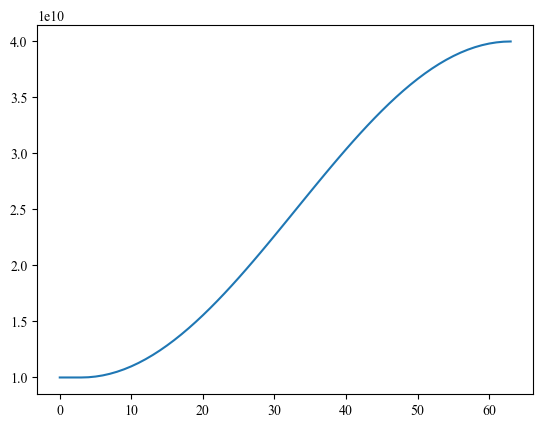

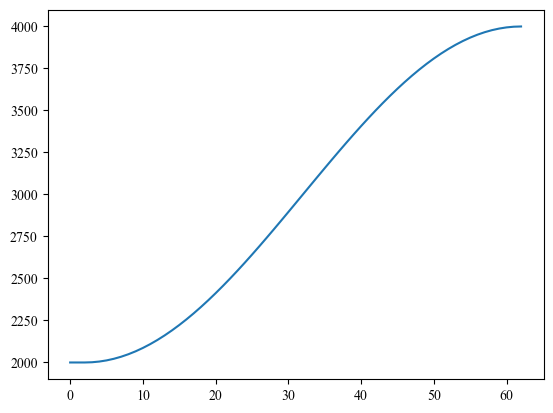

In [170]:
plt.plot(mu)
plt.figure()
plt.plot(rho)

## 3.2. Running Simulation Experiment

In [171]:
# Create new Experiment
experiment = ForwardExperiment1D(verbose=2)
experiment.add_solver('ode', **parameters)
# experiment.add_solver('exp', **parameters)
experiment.add_solver('local', **parameters)
# experiment.add_solver('cloud', **parameters)


2024-09-24 03:03:22,165 - INFO - Created experiment with time stamp: 20240924T030322.

2024-09-24 03:03:22,166 - INFO - Adding solver 1: ode
2024-09-24 03:03:22,173 - INFO - Parameters checked for validity.
2024-09-24 03:03:22,175 - INFO - Solving for 19 time steps.
2024-09-24 03:03:22,177 - INFO - Calculating Transformation and Hamiltonian.
2024-09-24 03:03:22,182 - INFO - Calculation completed.
2024-09-24 03:03:22,183 - INFO - Medium initialized.
2024-09-24 03:03:22,185 - INFO - Initial state forward-transformed.
2024-09-24 03:03:22,186 - INFO - Solver 0 added.

2024-09-24 03:03:22,187 - INFO - Adding solver 2: local
2024-09-24 03:03:22,191 - INFO - Parameters checked for validity.
2024-09-24 03:03:22,192 - INFO - Solving for 19 time steps.
2024-09-24 03:03:22,194 - INFO - Calculating Transformation and Hamiltonian.
2024-09-24 03:03:22,198 - INFO - Calculation completed.
2024-09-24 03:03:22,199 - INFO - Medium initialized.
2024-09-24 03:03:22,201 - INFO - Initial state transformed.
2

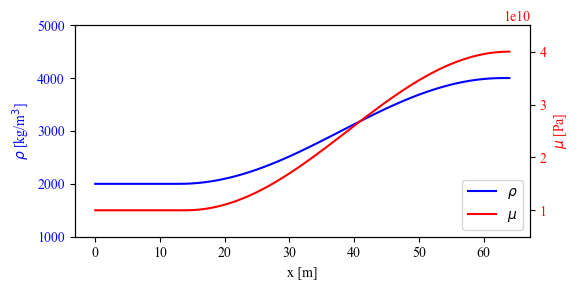

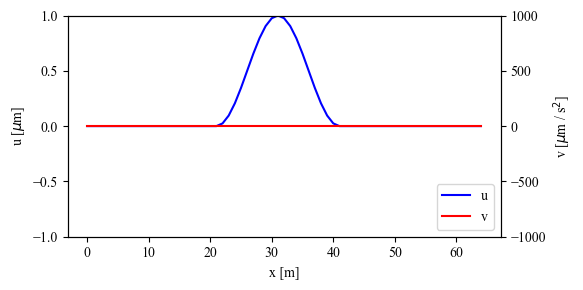

In [172]:
# Plot medium properties
experiment.plot('medium', solvers=[0])
# Plot initial conditions
experiment.plot('initial', solvers=[0])



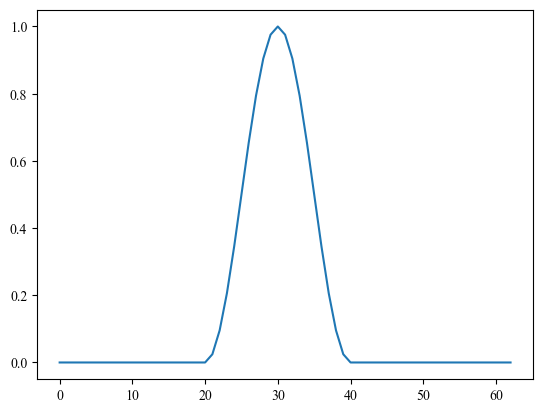

In [173]:
plt.plot(raised_cosine(1, nx, 30, 10, 0))

In [174]:
# Run Experiment
results = experiment.run()


2024-09-24 03:03:24,016 - INFO - Running solver 1: ode
2024-09-24 03:03:24,019 - INFO - Solving ODE.
2024-09-24 03:03:24,161 - INFO - ODE solved.
2024-09-24 03:03:24,172 - INFO - States inverse-transformed.
2024-09-24 03:03:24,173 - INFO - Saving data.
2024-09-24 03:03:24,175 - INFO - Solver 1 completed in 0:00:00.157448.

2024-09-24 03:03:24,177 - INFO - Running solver 2: local
2024-09-24 03:03:24,178 - INFO - Initializing backend.
2024-09-24 03:03:24,179 - INFO - Setting backend options.
2024-09-24 03:03:24,180 - INFO - Initializing sampler backend.
2024-09-24 03:03:24,181 - INFO - Backend initialized.
2024-09-24 03:03:24,182 - INFO - Generating circuits.
2024-09-24 03:03:24,192 - INFO - Preparing arbitrary initial state.
2024-09-24 03:03:24,196 - INFO - Generating circuits for step: 1 | 18.
2024-09-24 03:03:24,309 - INFO - Generating circuits for step: 2 | 18.
2024-09-24 03:03:24,495 - INFO - Generating circuits for step: 3 | 18.
2024-09-24 03:03:24,599 - INFO - Generating circuits 

In [175]:
# Plot one of the quantum circuits
# experiment.plot('circuit', solvers=[1], group=0, idx=10)


## 4. Loading Simulation Experiment

In [177]:
# Load experiment from the cloud / local with experiment ID
exp_id = '20231203T101131' # example
exp_id = '20240924T020740' # ode and local 9 data points
exp_id = '20240924T030220' # ode and local 9 data points
exp_id = '20240924T030322' # ode and local 9 data points


experiment = ForwardExperiment1D(experiment_id=exp_id, verbose=2, data_folder='examples')
results = experiment.load()


2024-09-24 10:27:21,152 - INFO - Loading experiment with time stamp: 20240924T030322.

2024-09-24 10:27:21,156 - INFO - Loading data for solver 1.
2024-09-24 10:27:21,160 - INFO - Loading data for solver 2.
2024-09-24 10:27:21,164 - INFO - Data loaded.



## 5. Visualizing Results

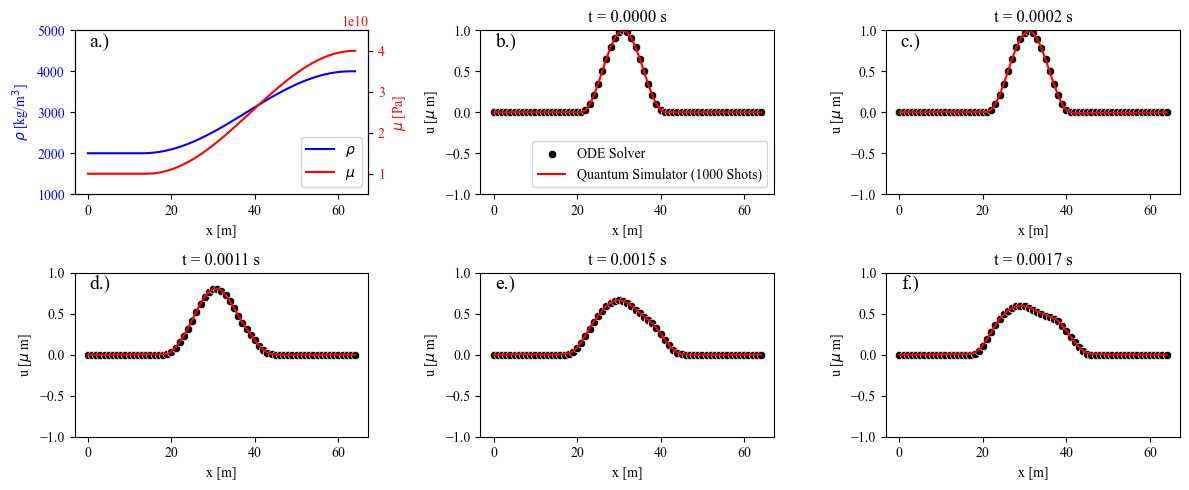

In [178]:
# Plot results for five time steps
experiment.plot('multi', solvers=[0,1], idx=[0,2,11,15,17],
                shots=[None,1000,1000], colors=['black','red','blue'])


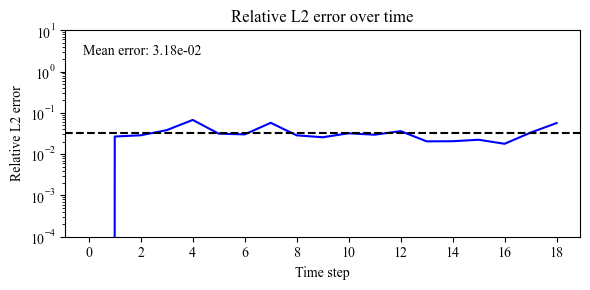

In [160]:
# Plot error between solvers
experiment.plot('error', solvers=[0,1])
